In [ ]:
'''
【项目03】  知乎数据清洗整理和结论研究

作业要求：
1、数据清洗 - 去除空值
要求：创建函数
提示：fillna方法填充缺失数据，注意inplace参数

2、问题1 知友全国地域分布情况，分析出TOP20
要求：
① 按照地域统计 知友数量、知友密度（知友数量/城市常住人口），不要求创建函数
② 知友数量，知友密度，标准化处理，取值0-100，要求创建函数
③ 通过多系列柱状图，做图表可视化
提示：
① 标准化计算方法 = (X - Xmin) / (Xmax - Xmin)
② 可自行设置图表风格

3、问题2 知友全国地域分布情况，分析出TOP20
要求：
① 按照学校（教育经历字段） 统计粉丝数（‘关注者’）、关注人数（‘关注’），并筛选出粉丝数TOP20的学校，不要求创建函数
② 通过散点图 → 横坐标为关注人数，纵坐标为粉丝数，做图表可视化
③ 散点图中，标记出平均关注人数（x参考线），平均粉丝数（y参考线）
提示：
① 可自行设置图表风格

'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('grid', alpha=0.8, linestyle='--', color='#b0b0b0', linewidth='0.8') 
matplotlib.rcParams['axes.grid'] = True

% matplotlib inline

In [2]:

#读取知乎数据
df1 = pd.read_csv('知乎数据_201701_utf8.csv', engine='python', encoding='utf-8')
df1.head()

,_id,关注的收藏夹,关注,关注者,关注的问题,关注的话题,关注的专栏,职业1,职业2,回答,提问,收藏,个人简介,居住地,所在行业,教育经历,职业经历
0,587598f89f11daf90617fb7a,52,17,1,30,58,2,交通仓储,邮政,0.0,0.0,3.0,NaN,NaN,邮政,NaN,NaN
1,587598f89f11daf90617fb7c,27,73,15,87,26,1,高新科技,互联网,56.0,4.0,14.0,NaN,重庆,互联网,重庆邮电大学,NaN
2,587598f89f11daf90617fb7e,72,94,1,112,20,4,NaN,NaN,1.0,0.0,21.0,NaN,NaN,NaN,NaN,NaN
3,587598f89f11daf90617fb80,174,84,8,895,30,7,金融,财务,0.0,0.0,22.0,NaN,NaN,财务,NaN,NaN
4,587598f89f11daf90617fb82,3,236,64,119,44,17,金融,证券投资,6.0,0.0,12.0,无求 心静 魔不生,上海,证券投资,雪城大学（Syracuse University）,NaN


In [3]:
df2 = pd.read_csv('六普常住人口数_utf8.csv', engine='python', encoding='utf-8')
df2.head()

,省,地区,结尾,常住人口
0,安徽省,安徽省,省,59500468.0
1,安徽省,安庆市,市,5311379.0
2,安徽省,蚌埠市,市,3164467.0
3,安徽省,亳州市,市,4850657.0
4,安徽省,巢湖市,市,3873102.0


In [4]:
#清洗数据
def data_clean(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna('缺失数据',inplace=True)
        else:
            df[col].fillna(0, inplace=True)
    return df
            
df1_cleaned = data_clean(df1)
df1_cleaned.head(10)
    

,_id,关注的收藏夹,关注,关注者,关注的问题,关注的话题,关注的专栏,职业1,职业2,回答,提问,收藏,个人简介,居住地,所在行业,教育经历,职业经历
0,587598f89f11daf90617fb7a,52,17,1,30,58,2,交通仓储,邮政,0.0,0.0,3.0,缺失数据,缺失数据,邮政,缺失数据,缺失数据
1,587598f89f11daf90617fb7c,27,73,15,87,26,1,高新科技,互联网,56.0,4.0,14.0,缺失数据,重庆,互联网,重庆邮电大学,缺失数据
2,587598f89f11daf90617fb7e,72,94,1,112,20,4,缺失数据,缺失数据,1.0,0.0,21.0,缺失数据,缺失数据,缺失数据,缺失数据,缺失数据
3,587598f89f11daf90617fb80,174,84,8,895,30,7,金融,财务,0.0,0.0,22.0,缺失数据,缺失数据,财务,缺失数据,缺失数据
4,587598f89f11daf90617fb82,3,236,64,119,44,17,金融,证券投资,6.0,0.0,12.0,无求 心静 魔不生,上海,证券投资,雪城大学（Syracuse University）,缺失数据
5,587598f89f11daf90617fb84,15,577,46,7472,131,81,缺失数据,缺失数据,0.0,0.0,21.0,缺失数据,缺失数据,缺失数据,缺失数据,缺失数据
6,587598f89f11daf90617fb86,13,52,3,47,2,6,缺失数据,缺失数据,0.0,0.0,0.0,大王叫我来巡山。,缺失数据,缺失数据,缺失数据,缺失数据
7,587598f89f11daf90617fb88,105,104,2,55,46,13,高新科技,电子商务,0.0,0.0,0.0,缺失数据,山东,电子商务,缺失数据,缺失数据
8,587598f89f11daf90617fb8a,795,268,39,49,1,69,高新科技,互联网,0.0,0.0,0.0,缺失数据,缺失数据,互联网,缺失数据,缺失数据
9,587598f89f11daf90617fb8c,8,111,3,31,6,3,缺失数据,缺失数据,0.0,0.0,2.0,缺失数据,缺失数据,缺失数据,缺失数据,缺失数据


In [5]:
data_city = df1_cleaned.groupby('居住地').count()
data_city.tail(10)
df2['city'] = df2['地区'].str[:-1]
data = pd.merge(data_city, df2, left_index=True, right_on='city', how='inner')[['_id','city','常住人口']]
data.rename(columns={'_id':'count'}, inplace=True) #将 _id 的列名修改为 count
data.head()

,count,city,常住人口
565,3117,上海,23019196.0
642,1,东阳,804398.0
656,1,临海,1028813.0
357,1,丹阳,1660662.0
669,1,义乌,1234015.0


In [6]:
#计算按地域统计知友的数量，获得 Top20 
data_count_top20 = data.sort_values(by=['count'],ascending=False)[['city','count']].iloc[:20]
data_count_top20.head(10)

,city,count
23,北京,4165
72,广东,3948
565,上海,3117
363,江苏,1951
672,浙江,1738
268,湖北,1133
591,四川,1124
511,山东,1023
556,陕西,795
26,福建,784


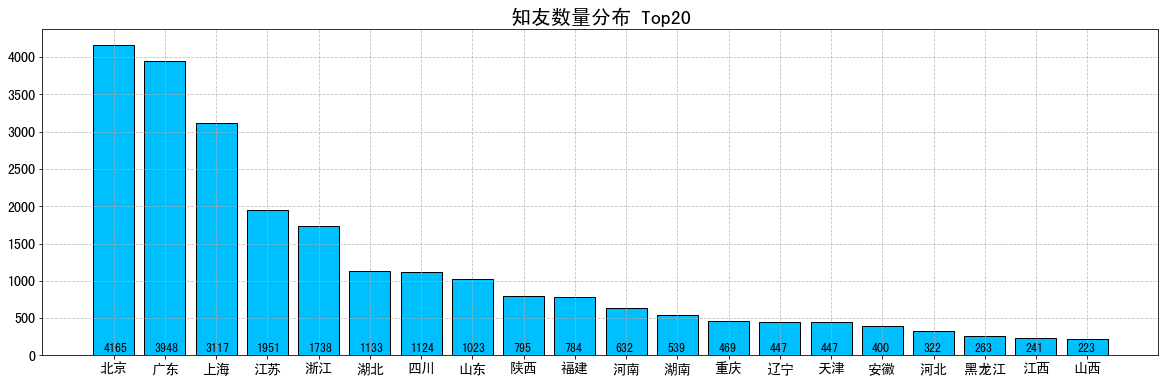

In [7]:
#绘制知友数量的 top20
plt.figure(figsize=(20,6))
x = range(20)
y = data_count_top20['count']
label = data_count_top20['city']

plt.bar(x, 
        y,
        width=0.8, 
        facecolor = 'deepskyblue', 
        edgecolor='k', 
        tick_label= label
       )
plt.title('知友数量分布 Top20', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#将数量标记在图表上
for i,j in zip(x, y):
    plt.text(i-0.2, 50, j, color='black', fontsize=12)

In [8]:
#计算密度
data['密度'] = data['count'] / data['常住人口'] 
data.head()

,count,city,常住人口,密度
565,3117,上海,23019196.0,1.354087e-04
642,1,东阳,804398.0,1.243166e-06
656,1,临海,1028813.0,9.719939e-07
357,1,丹阳,1660662.0,6.021695e-07
669,1,义乌,1234015.0,8.103629e-07


In [9]:
#密度排行的 Top20
data_md_top20 = data.sort_values(by=['密度'],ascending=False)[['city', '密度']].iloc[:20]
data_md_top20.head(10)

,city,密度
23,北京,0.000212
565,上海,0.000135
72,广东,0.000038
599,天津,0.000035
335,吉林,0.000034
672,浙江,0.000032
363,江苏,0.000025
556,陕西,0.000021
26,福建,0.000021
268,湖北,0.000020


(array([0.00e+00, 2.50e-05, 5.00e-05, 7.50e-05, 1.00e-04, 1.25e-04,
        1.50e-04, 1.75e-04, 2.00e-04, 2.25e-04]),
 <a list of 10 Text yticklabel objects>)

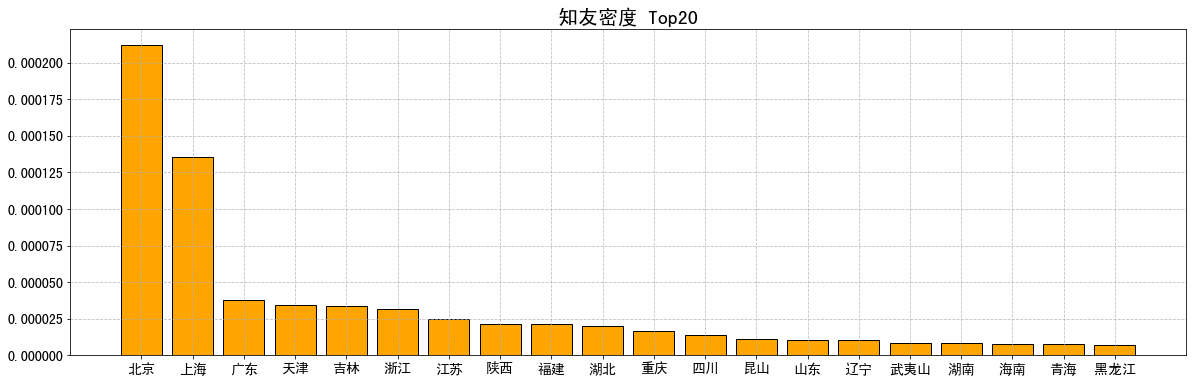

In [10]:
# 绘制密度 Top20 的图表
plt.figure(figsize=(20,6))

x = range(20)
y = data_md_top20['密度']
label = data_md_top20['city']
plt.bar(x,
        y,
        width=0.8,
        facecolor='orange',
        edgecolor='k',
        tick_label= label
       )
plt.title("知友密度 Top20", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


In [11]:
#标准化处理
def data_normal(df, column):
    min = df[column].min()
    max = df[column].max()
    column_normal = []
    for d in df[column]:
        normal = (d-min)/(max-min)*100
        column_normal.append(normal)
    df[column+'_normal'] = column_normal   

In [12]:
#知友数量标准化
data_normal(data, 'count')
data_count_normal_top20 = data.sort_values(by=['count'], ascending=False)[['city','count','count_normal']].iloc[:20]
data_count_normal_top20

,city,count,count_normal
23,北京,4165,100.000000
72,广东,3948,94.788665
565,上海,3117,74.831892
363,江苏,1951,46.829971
672,浙江,1738,41.714697
268,湖北,1133,27.185399
591,四川,1124,26.969260
511,山东,1023,24.543708
556,陕西,795,19.068204
26,福建,784,18.804035


In [13]:
#知友密度标准化
data_normal(data, '密度')
data_md_normal_top20 = data.sort_values(by=['密度'],ascending=False)[['city','密度','密度_normal']].iloc[:20]
data_md_normal_top20

,city,密度,密度_normal
23,北京,0.000212,100.000000
565,上海,0.000135,63.673633
72,广东,0.000038,17.620303
599,天津,0.000035,16.063828
335,吉林,0.000034,15.800308
672,浙江,0.000032,14.829559
363,江苏,0.000025,11.463920
556,陕西,0.000021,9.809628
26,福建,0.000021,9.786924
268,湖北,0.000020,9.099972


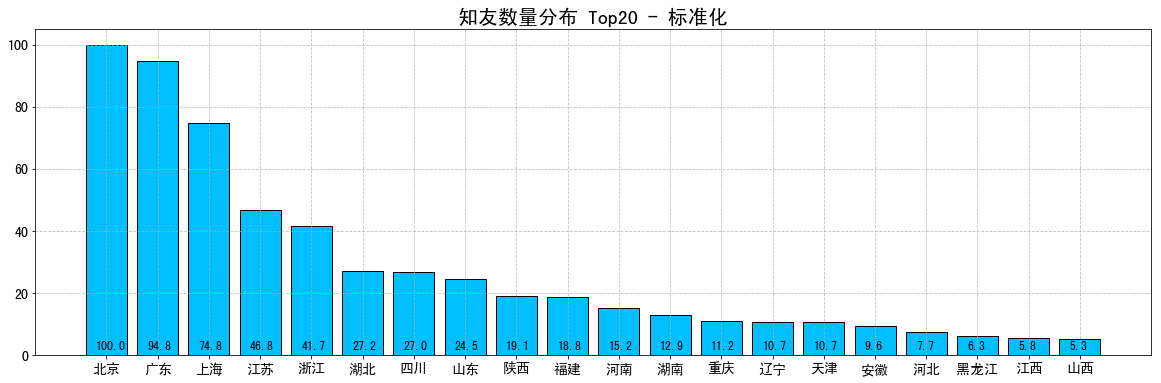

In [14]:
#绘制图表
plt.figure(figsize=(20,6))
x = range(20)
y = data_count_normal_top20['count_normal']
label = data_count_top20['city']
plt.bar(x,
        y,
        facecolor='deepskyblue',
        edgecolor='k',
        tick_label=label
       )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("知友数量分布 Top20 - 标准化", fontsize=20)
for i, j in zip(x,y):
    plt.text(i-0.2, 2, '%.1f' % j, color='black', fontsize=12)

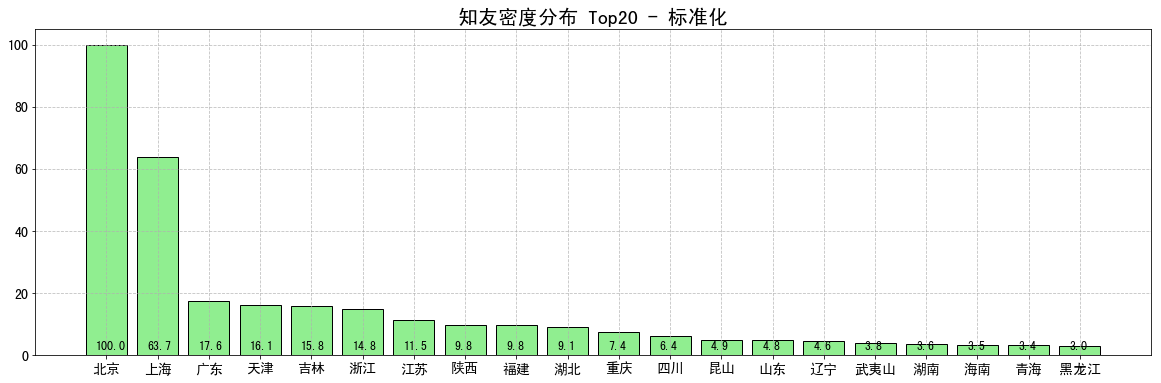

In [15]:
plt.figure(figsize=(20,6))
x = range(20)
y = data_md_normal_top20['密度_normal']
label = data_md_top20['city']
plt.bar(x,
        y,
        facecolor='lightgreen',
        edgecolor='k',
        tick_label=label
       )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("知友密度分布 Top20 - 标准化", fontsize=20)
for i, j in zip(x,y):
    plt.text(i-0.2, 2, '%.1f' % j, color='black', fontsize=12)

In [ ]:
'''
3、问题2 知友全国地域分布情况，分析出TOP20
要求：
① 按照学校（教育经历字段） 统计粉丝数（‘关注者’）、关注人数（‘关注’），并筛选出粉丝数TOP20的学校，不要求创建函数
② 通过散点图 → 横坐标为关注人数，纵坐标为粉丝数，做图表可视化
③ 散点图中，标记出平均关注人数（x参考线），平均粉丝数（y参考线）
'''

In [16]:
#排序获取 top20 的时候发现‘缺失数据’，‘大学’，‘本科’这三个排名很靠前，丢弃它们
data_jy = df1_cleaned.groupby(['教育经历']).sum()[['关注','关注者']].drop(['缺失数据','大学','本科','大学本科'])
data_jy.tail(10)

,关注,关注者
教育经历,,
鼓浪屿职业技术学院,192,28
齐鲁工业大学,656,14
齐鲁皇家建筑学院,647,72
齐鲁皇家搅基大学,182,67
齐齐哈尔咸鱼大学,81,3
齐齐哈尔大学,100,5
齐齐哈尔工程学院,913,9
龙岩学院,42,1
龙王山皇家气象学院东北某四线城市一高中,98,2


In [17]:
#排序筛选出 top20
data_jy_top20 = data_jy.sort_values(by='关注', ascending=False)[:20]
data_jy_top20

,关注,关注者
教育经历,,
浙江大学,42781,603446
武汉大学,41335,51632
北京大学,40306,196602
华中科技大学,37232,24487
上海交通大学,27136,45261
深圳大学,26412,2537
复旦大学,25726,31069
哈尔滨工业大学（HIT）,24258,101004
东南大学,24176,41420


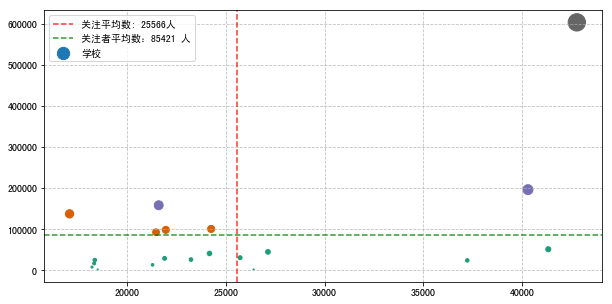

In [40]:
##### 绘制图表
plt.figure(figsize=(10,5))
x = data_jy_top20['关注']
y = data_jy_top20['关注者']
plt.scatter(x,
            y,
            s = y/500,
            marker='.',
            cmap='Dark2',
            c = y,
            label='学校'
           )
follow_mean = x.mean()
fans_mean = y.mean()
plt.axvline(follow_mean, hold=None, label='关注平均数: %i人' %follow_mean, color='r',linestyle='--',alpha=0.8)
plt.axhline(fans_mean, hold=None, label='关注者平均数：%i 人' %fans_mean, color='g',linestyle='--',alpha=0.8)
plt.legend(loc = 'upper left')